## Peter Chika Ozo-ogueji(AU ID:5263783)
## FIN 666-Advanced Quant Methods and Machine Learning in Finance:

### Homework 5:

The FIN 666 - Advanced Quantitative Methods and Machine Learning in Finance Homework 5 assignment focuses on time series modeling and financial data analysis, combining theoretical and computational tasks. The theoretical section requires students to prove that a Moving Average (MA(1)) model can be represented as an AutoRegressive (AR(∞)) model, similar to how an AR(1) model expands into an MA(∞) model. This task reinforces fundamental time series concepts and their mathematical transformations. The computational section, which carries the majority of the assignment's weight, involves working with real-world financial data from the Federal Reserve Economic Data (FRED) database. Students must download daily S&P 500 index data for the past 10 years, address missing values, and conduct exploratory data analysis by plotting the index and its daily returns. They will also compute and visualize the autocorrelation and partial autocorrelation functions to understand time-dependent patterns in the dataset.

Beyond data exploration, the assignment requires students to estimate an AR(1) model for both the S&P 500 index and its returns and compare their log-likelihood values to determine the more appropriate modeling approach. Additionally, students must identify the best-fitting AR(p) and MA(q) models for the S&P 500 returns using a structured model selection process. They will also estimate an ARMA(p,q) model and determine the optimal parameter combination. To evaluate model performance, students will compare the AR, MA, and ARMA models using the Likelihood Ratio Test and Information Criteria. The final task involves analyzing the residuals of the best-selected model by plotting them and testing for white noise characteristics through the Augmented Dickey-Fuller test and an autocorrelation assessment. Overall, the assignment integrates theoretical understanding with practical implementation, requiring students to apply advanced time series analysis techniques to real financial data.


In [4]:
# Part II: Computational (80%)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Importing SP500 data 

In [6]:
# 2. Read the S&P 500 data from FRED
# First check for missing values in the CSV file
file_path = 'SP500.csv'
df = pd.read_csv(file_path)
print("Data shape:", df.shape)
print("Checking for missing values:", df.isna().sum())

Data shape: (2610, 2)
Checking for missing values: observation_date     0
SP500               94
dtype: int64


In [7]:
# Step 1: Load and prepare the data
df = pd.read_csv('SP500.csv')
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)
df['returns'] = df['SP500'].pct_change() * 100  # Convert to percentage points
df = df.dropna()  # Remove rows with NaN values (first row after calculating returns)
df.head()

,SP500,returns
observation_date,,
2015-03-03,2107.78,-0.453861
2015-03-04,2098.53,-0.438850
2015-03-05,2101.04,0.119608
2015-03-06,2071.26,-1.417393
2015-03-09,2079.43,0.394446


## a. Plot the index and its daily return over the 10-year period

Text(0, 0.5, 'Index Value')

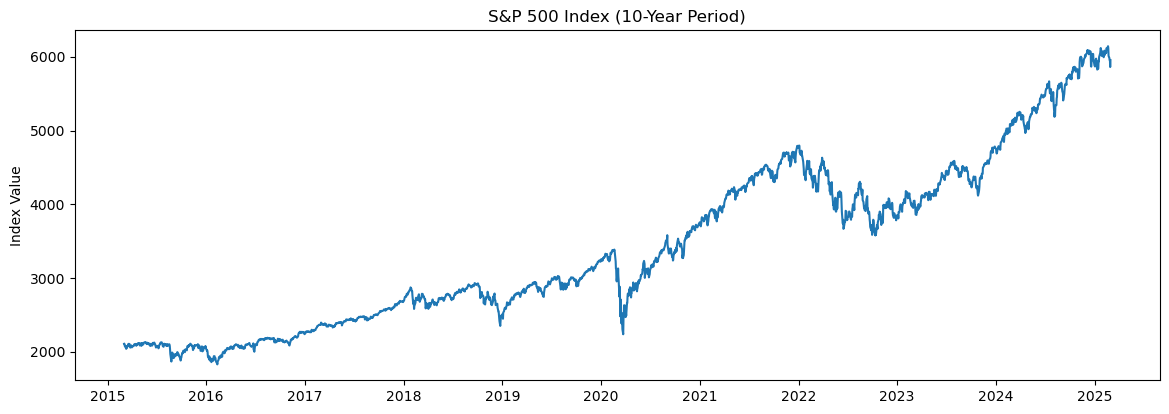

In [9]:

plt.figure(figsize=(14, 10))

# Plot the S&P 500 index
plt.subplot(2, 1, 1)
plt.plot(df['SP500'])
plt.title('S&P 500 Index (10-Year Period)')
plt.ylabel('Index Value')


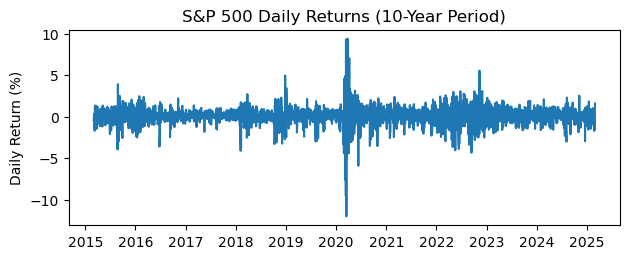

In [10]:
# Plot the daily returns
plt.subplot(2, 1, 2)
plt.plot(df['returns'])
plt.title('S&P 500 Daily Returns (10-Year Period)')
plt.ylabel('Daily Return (%)')

plt.tight_layout()
plt.savefig('sp500_and_returns.png')

b. Plot the autocorrelation and partial autocorrelation functions for the index and the 
retur  variable.

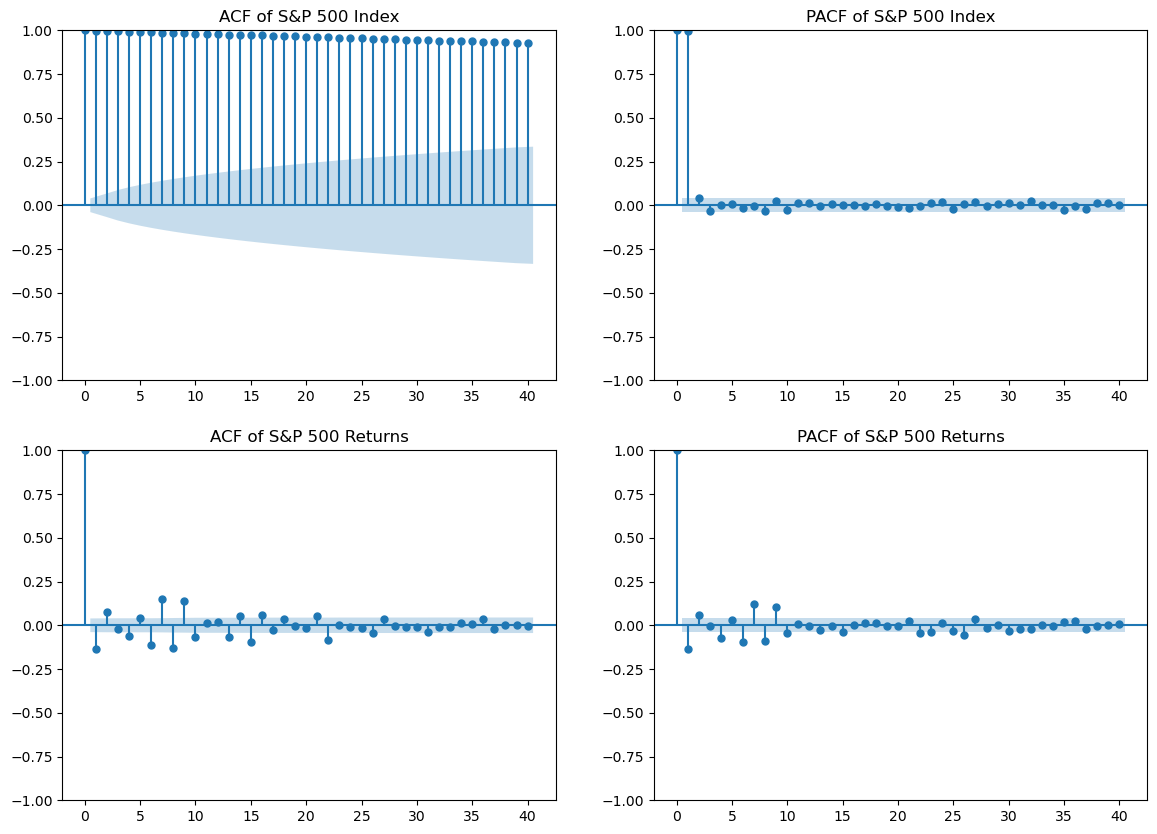

In [12]:

# Create a figure with 2x2 subplots for ACF and PACF of both series
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ACF and PACF for the S&P 500 index
plot_acf(df['SP500'], lags=40, ax=axes[0, 0], title='ACF of S&P 500 Index')
axes[0, 0]

plot_pacf(df['SP500'], lags=40, ax=axes[0, 1], title='PACF of S&P 500 Index')
axes[0, 1]

# ACF and PACF for the S&P 500 returns
plot_acf(df['returns'], lags=40, ax=axes[1, 0], title='ACF of S&P 500 Returns')
axes[1, 0]

plot_pacf(df['returns'], lags=40, ax=axes[1, 1], title='PACF of S&P 500 Returns')
axes[1, 1]


plt.savefig('acf_pacf_plots.png')
plt.show()

c. Estimate an AR(1) model using the S&P 500 index. Also, estimate an AR(1) model using the S&P 500 returns. Compare the goodness-of-fit for these two models by comparing the log likelihoods for the two estimated models. Based on this result, are we better off to model the S&P 500 index or its returns? Why?

In [14]:
# Estimate AR(1) model for the index
model_index = ARIMA(df['SP500'], order=(1, 0, 0))
results_index = model_index.fit()
print("AR(1) Model for S&P 500 Index:")
print(results_index.summary().tables[1])  # Display parameter table

# Estimate AR(1) model for the returns
model_returns = ARIMA(df['returns'], order=(1, 0, 0))
results_returns = model_returns.fit()
print("\nAR(1) Model for S&P 500 Returns:")
print(results_returns.summary().tables[1])  # Display parameter table

# Compare log likelihoods
ll_index = results_index.llf
ll_returns = results_returns.llf
aic_index = results_index.aic
aic_returns = results_returns.aic
bic_index = results_index.bic
bic_returns = results_returns.bic

print("\nModel Comparison:")
print(f"Log Likelihood for Index Model: {ll_index:.4f}")
print(f"Log Likelihood for Returns Model: {ll_returns:.4f}")
print(f"AIC for Index Model: {aic_index:.4f}")
print(f"AIC for Returns Model: {aic_returns:.4f}")
print(f"BIC for Index Model: {bic_index:.4f}")
print(f"BIC for Returns Model: {bic_returns:.4f}")

# Check stationarity to provide context for the comparison
# For the index
adf_index = adfuller(df['SP500'])
print("\nADF Test for Index:")
print(f'ADF Statistic: {adf_index[0]:.4f}')
print(f'p-value: {adf_index[1]:.4f}')
if adf_index[1] < 0.05:
    print("The S&P 500 index is stationary (reject the null hypothesis of unit root)")
else:
    print("The S&P 500 index is non-stationary (fail to reject the null hypothesis of unit root)")

# For the returns
adf_returns = adfuller(df['returns'])
print("\nADF Test for Returns:")
print(f'ADF Statistic: {adf_returns[0]:.4f}')
print(f'p-value: {adf_returns[1]:.4f}')
if adf_returns[1] < 0.05:
    print("The S&P 500 returns are stationary (reject the null hypothesis of unit root)")
else:
    print("The S&P 500 returns are non-stationary (fail to reject the null hypothesis of unit root)")

AR(1) Model for S&P 500 Index:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3418.0604   1638.434      2.086      0.037     206.790    6629.331
ar.L1          0.9997      0.001   1406.747      0.000       0.998       1.001
sigma2      1432.9910     19.252     74.434      0.000    1395.258    1470.724

AR(1) Model for S&P 500 Returns:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0474      0.020      2.350      0.019       0.008       0.087
ar.L1         -0.1373      0.008    -17.808      0.000      -0.152      -0.122
sigma2         1.2358      0.014     87.281      0.000       1.208       1.264

Model Comparison:
Log Likelihood for Index Model: -12710.8713
Log Likelihood for Returns Model: -3834.8635
AIC for Index Model: 25427.7427
AIC f

### Based on the results shown, we are better off modeling the S&P 500 returns rather than the index itself. Here's why:

### Stationarity: The ADF test clearly shows that the S&P 500 index is non-stationary (p-value = 0.9825) while the returns are stationary (p-value = 0.0000). Stationarity is a fundamental requirement for time series modeling with ARIMA models. Non-stationary series can lead to spurious regressions and unreliable forecasts.
### AR Coefficient: The AR(1) coefficient for the index is 0.9997, which is extremely close to 1. This near-unit root behavior confirms the non-stationarity of the index and suggests that the model is essentially a random walk with drift. In contrast, the returns model has an AR(1) coefficient of -0.1373, which is well within the stationary range.
### Information Criteria: Both AIC and BIC are substantially lower for the returns model (AIC: 7675.7270, BIC: 7693.2171) compared to the index model (AIC: 25427.7427, BIC: 25445.2328). Lower values of these information criteria indicate better model fit.
### Theoretical Considerations: In finance, it's generally more appropriate to model returns rather than price levels. Returns have more stable statistical properties and align better with financial theory about risk and reward.
### Practical Implications: Models based on stationary series like returns provide more reliable forecasts and statistical inferences, making them more useful for investment decisions and risk management.

### While the log-likelihood appears higher (less negative) for the index model (-12710.8713) compared to the returns model (-3834.8635), this is misleading because the two models are not directly comparable in terms of log-likelihood due to the different scales and properties of the dependent variables. The information criteria (AIC and BIC), which penalize for model complexity, provide a more appropriate basis for comparison and clearly favor the returns model.

#### d. Find the AR(p) model that fits the S&P 500 returns well. [Hint: follow the 5-step  algorithm for model selection]

Step 1: Start with p=1 and estimate AR(1) model
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0474      0.020      2.350      0.019       0.008       0.087
ar.L1         -0.1373      0.008    -17.808      0.000      -0.152      -0.122
sigma2         1.2358      0.014     87.281      0.000       1.208       1.264

Step 2: Set p=2 and estimate AR(2) model
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0474      0.022      2.146      0.032       0.004       0.091
ar.L1         -0.1293      0.008    -15.377      0.000      -0.146      -0.113
ar.L2          0.0586      0.008      7.485      0.000       0.043       0.074
sigma2         1.2315      0.014     87.749      0.000       1.204       1.259
Step 3: Last coefficient p-value = 0.0000

<Figure size 1000x600 with 0 Axes>

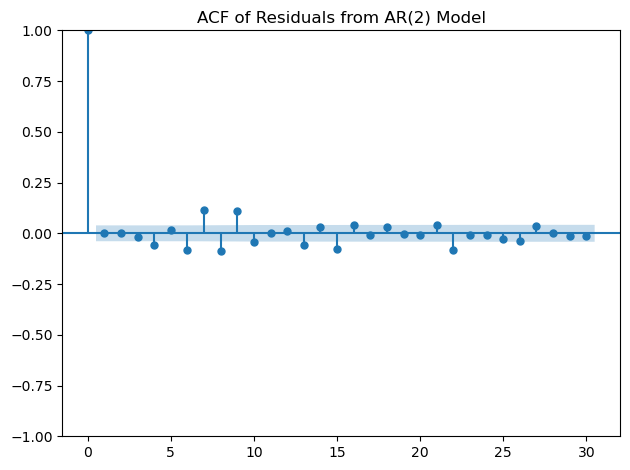


Best model: AR(2)
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0474      0.022      2.146      0.032       0.004       0.091
ar.L1         -0.1293      0.008    -15.377      0.000      -0.146      -0.113
ar.L2          0.0586      0.008      7.485      0.000       0.043       0.074
sigma2         1.2315      0.014     87.749      0.000       1.204       1.259
AIC: 7669.0774
BIC: 7692.3975
Log Likelihood: -3830.5387


In [17]:

# Step 1: Start with p=1 and estimate the AR(1) model
print("Step 1: Start with p=1 and estimate AR(1) model")
model_ar1 = ARIMA(df['returns'], order=(1, 0, 0))
results_ar1 = model_ar1.fit()
print(results_ar1.summary().tables[1])

p = 1
best_model = results_ar1
best_p = p
best_aic = results_ar1.aic
best_bic = results_ar1.bic
best_llf = results_ar1.llf

proceed = True
while proceed and p < 10:  # Set a reasonable upper limit
    # Step 2: Set p=p+1 and estimate the AR(p) model
    p += 1
    print(f"\nStep 2: Set p={p} and estimate AR({p}) model")
    try:
        model = ARIMA(df['returns'], order=(p, 0, 0))
        results = model.fit()
        print(results.summary().tables[1])
        
        # Step 3: Check if the last coefficient is statistically significant
        last_coef_pvalue = results.pvalues[-2]  # -2 because -1 is sigma2
        print(f"Step 3: Last coefficient p-value = {last_coef_pvalue:.4f}")
        
        if last_coef_pvalue < 0.05:
            # Step 4: Compare the Log Likelihood and Information Criteria
            print("Step 4: Compare models using Log Likelihood Ratio Test")
            lr_statistic = -2 * (best_llf - results.llf)
            lr_pvalue = 1 - stats.chi2.cdf(lr_statistic, 1)  # df=1 for one additional parameter
            print(f"LR test statistic: {lr_statistic:.4f}, p-value: {lr_pvalue:.4f}")
            
            if lr_pvalue < 0.05:
                best_model = results
                best_p = p
                best_aic = results.aic
                best_bic = results.bic
                best_llf = results.llf
                print(f"AR({p}) is an improvement. Continue to Step 2.")
            else:
                print(f"AR({p}) is NOT an improvement. Go to Step 5.")
                proceed = False
        else:
            print(f"Last coefficient is not significant. Go to Step 5.")
            proceed = False
    except:
        print(f"Error fitting AR({p}) model. Stopping.")
        proceed = False

# Step 5: Check if residuals are white noise
print("\nStep 5: Check if residuals are white noise")
residuals = best_model.resid

# Check autocorrelations with Ljung-Box test
lb_test = sm.stats.acorr_ljungbox(residuals, lags=[10, 15, 20], return_df=True)
print("Ljung-Box test for autocorrelation in residuals:")
print(lb_test)

# ADF test for stationarity of residuals
adf_test = adfuller(residuals)
print("\nADF test for residuals:")
print(f"ADF Statistic: {adf_test[0]:.4f}")
print(f"p-value: {adf_test[1]:.4f}")

# Check if residuals are white noise
residuals_white_noise = (adf_test[1] < 0.05) and all(lb_test['lb_pvalue'] > 0.05)

if residuals_white_noise:
    print("\nThe residuals appear to be white noise (Accept the model)")
else:
    print("\nThe residuals do NOT appear to be white noise")
    
    # Check ACF of residuals to identify potential issues
    plt.figure(figsize=(10, 6))
    plot_acf(residuals, lags=30)
    plt.title(f'ACF of Residuals from AR({best_p}) Model')
    plt.tight_layout()
    plt.show()

# Display the best model results
print(f"\nBest model: AR({best_p})")
print(best_model.summary().tables[1])
print(f"AIC: {best_aic:.4f}")
print(f"BIC: {best_bic:.4f}")
print(f"Log Likelihood: {best_llf:.4f}")

e. Find the MA(q) model that fits the S&P 500 returns well.

Significant lags in ACF: [1, 2, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 21, 22, 26]
Initial estimate for maximum q: 26

Step 1: Start with q=1 and estimate MA(1) model
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0474      0.020      2.318      0.020       0.007       0.087
ma.L1         -0.1221      0.008    -14.713      0.000      -0.138      -0.106
sigma2         1.2385      0.014     88.191      0.000       1.211       1.266

Step 2: Set q=2 and estimate MA(2) model
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0474      0.022      2.112      0.035       0.003       0.091
ma.L1         -0.1250      0.009    -14.673      0.000      -0.142      -0.108
ma.L2          0.0768      0.008      9.999      0.000       0.062       0.092
si

<Figure size 1000x600 with 0 Axes>

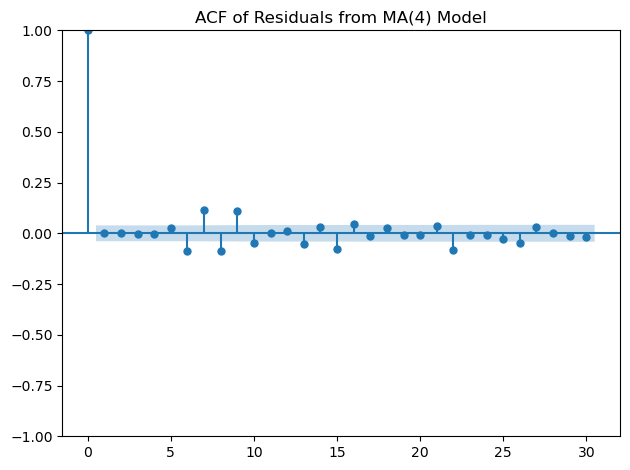

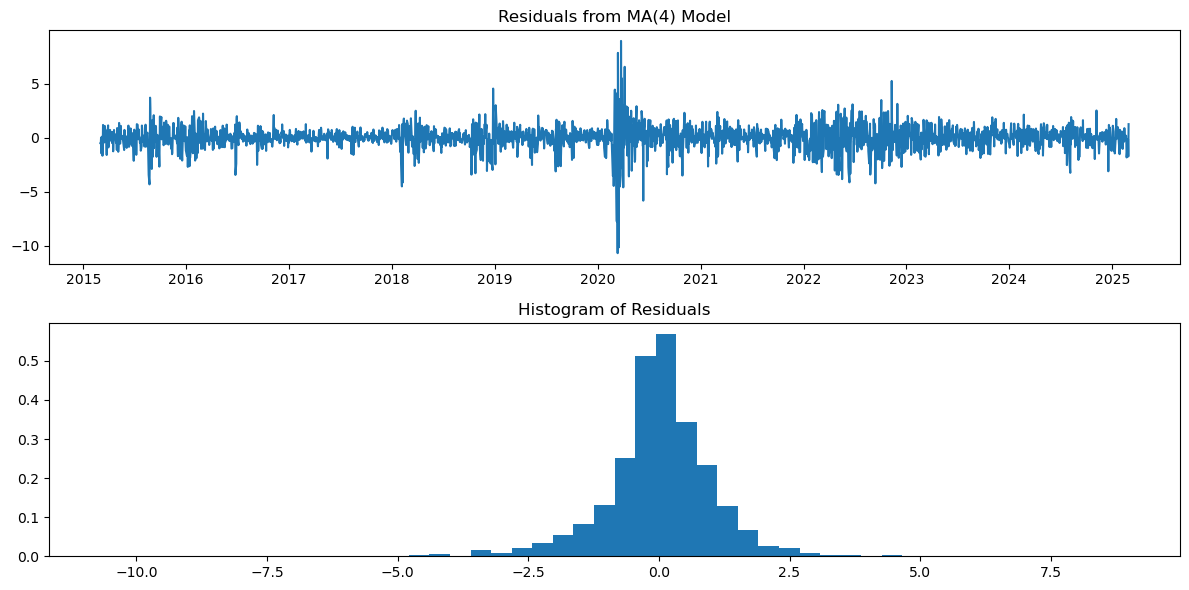

In [24]:
# First, examine the ACF to get an initial estimate for maximum q
acf_values = acf(df['returns'], nlags=30)
significance_level = 1.96 / np.sqrt(len(df))  # 95% confidence level
significant_acf_lags = [i for i in range(1, len(acf_values)) if abs(acf_values[i]) > significance_level]

print(f"Significant lags in ACF: {significant_acf_lags}")
print(f"Initial estimate for maximum q: {max(significant_acf_lags) if significant_acf_lags else 1}")

# Step 1: Start with q=1 and estimate MA(1) model
print("\nStep 1: Start with q=1 and estimate MA(1) model")
model_ma1 = ARIMA(df['returns'], order=(0, 0, 1))
results_ma1 = model_ma1.fit()
print(results_ma1.summary().tables[1])

q = 1
best_model = results_ma1
best_q = q
best_aic = results_ma1.aic
best_bic = results_ma1.bic
best_llf = results_ma1.llf

proceed = True
max_q = max(5, max(significant_acf_lags) if significant_acf_lags else 3)  # Set a reasonable upper limit

while proceed and q < max_q:
    # Step 2: Set q=q+1 and estimate the MA(q) model
    q += 1
    print(f"\nStep 2: Set q={q} and estimate MA({q}) model")
    try:
        model = ARIMA(df['returns'], order=(0, 0, q))
        results = model.fit()
        print(results.summary().tables[1])
        
        # Step 3: Check if the last coefficient is statistically significant
        last_coef_pvalue = results.pvalues[-2]  # -2 because -1 is sigma2
        print(f"Step 3: Last coefficient p-value = {last_coef_pvalue:.4f}")
        
        if last_coef_pvalue < 0.05:
            # Step 4: Compare models using Log Likelihood Ratio Test
            print("Step 4: Compare models using Log Likelihood Ratio Test")
            lr_statistic = -2 * (best_llf - results.llf)
            lr_pvalue = 1 - stats.chi2.cdf(lr_statistic, 1)  # df=1 for one additional parameter
            print(f"LR test statistic: {lr_statistic:.4f}, p-value: {lr_pvalue:.4f}")
            
            if lr_pvalue < 0.05:
                best_model = results
                best_q = q
                best_aic = results.aic
                best_bic = results.bic
                best_llf = results.llf
                print(f"MA({q}) is an improvement. Continue to Step 2.")
            else:
                print(f"MA({q}) is NOT an improvement. Go to Step 5.")
                proceed = False
        else:
            print(f"Last coefficient is not significant. Go to Step 5.")
            proceed = False
    except Exception as e:
        print(f"Error fitting MA({q}) model: {str(e)}. Stopping.")
        proceed = False

# Step 5: Check if residuals are white noise
print("\nStep 5: Check if residuals are white noise")
residuals = best_model.resid

# Check autocorrelations with Ljung-Box test
lb_test = sm.stats.acorr_ljungbox(residuals, lags=[10, 15, 20], return_df=True)
print("Ljung-Box test for autocorrelation in residuals:")
print(lb_test)

# ADF test for stationarity of residuals
adf_test = adfuller(residuals)
print("\nADF test for residuals:")
print(f"ADF Statistic: {adf_test[0]:.4f}")
print(f"p-value: {adf_test[1]:.4f}")

# Check if residuals are white noise
residuals_white_noise = (adf_test[1] < 0.05) and all(lb_test['lb_pvalue'] > 0.05)

if residuals_white_noise:
    print("\nThe residuals appear to be white noise (Accept the model)")
else:
    print("\nThe residuals do NOT appear to be white noise")
    
    # Check ACF of residuals to identify potential issues
    plt.figure(figsize=(10, 6))
    plot_acf(residuals, lags=30)
    plt.title(f'ACF of Residuals from MA({best_q}) Model')
    plt.tight_layout()
    plt.savefig(f'MA{best_q}_residuals_acf.png')
    print(f"ACF plot saved as 'MA{best_q}_residuals_acf.png'")

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title(f'Residuals from MA({best_q}) Model')
plt.subplot(212)
plt.hist(residuals, bins=50, density=True)
plt.title('Histogram of Residuals')
plt.tight_layout()
plt.savefig(f'MA{best_q}_residuals.png')
print(f"Residuals plot saved as 'MA{best_q}_residuals.png'")

# Display the best model results
print(f"\nBest model: MA({best_q})")
print(best_model.summary().tables[1])
print(f"AIC: {best_aic:.4f}")
print(f"BIC: {best_bic:.4f}")
print(f"Log Likelihood: {best_llf:.4f}")

# Compare with AR model if available
print("\nNote: To determine which is better between AR and MA models, compare their")
print("AIC, BIC, and log-likelihood values, and check the whiteness of residuals.")

f. Find the ARMA(p,q) model that fits the S&P 500 returns well. [Hint: How should you 
adjust the model selection algorithm?]

ADF Test for Stationarity of Returns:
ADF Statistic: -15.8977
p-value: 0.0000
Returns series is stationary
--------------------------------------------------
S&P 500 Returns - Descriptive Statistics:
count    2515.000000
mean        0.047447
std         1.122511
min       -11.984050
25%        -0.377611
50%         0.064784
75%         0.574874
max         9.382766
Name: returns, dtype: float64
--------------------------------------------------


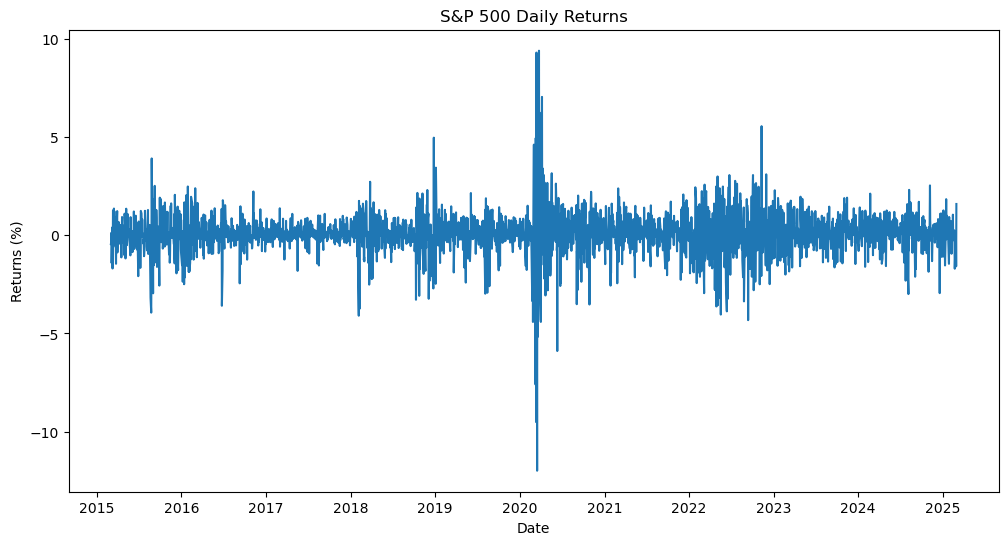

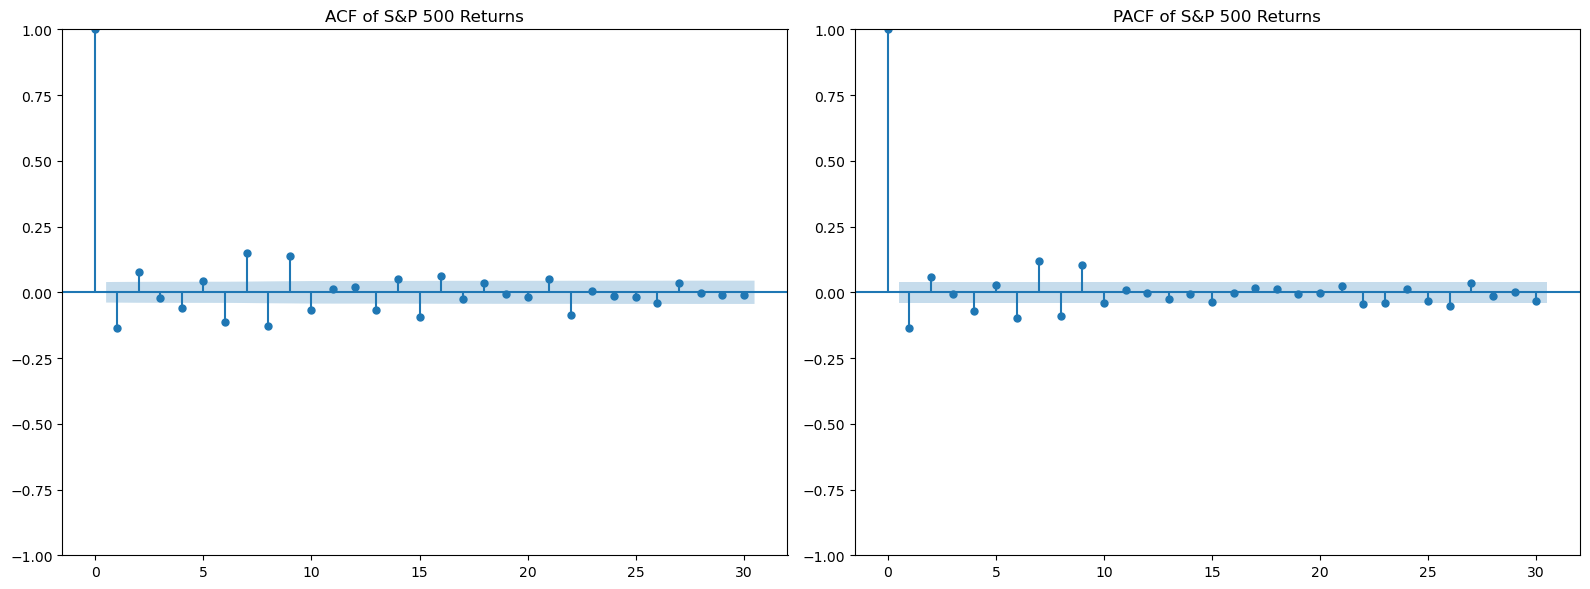

Significant lags in ACF: [1, 2, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 21, 22, 26]
Significant lags in PACF: [1, 2, 4, 6, 7, 8, 9, 10, 22, 23, 26]
Maximum p: 5, maximum q: 5
--------------------------------------------------

ARMA Model Selection
--------------------------------------------------

Residual Diagnostics for ARMA(0,1):
Ljung-Box test (no autocorrelation): Fail
ADF test (residuals stationary): Pass
White noise test: Fail
ARMA(0,1) - AIC: 7681.2226, BIC: 7698.7127, Parameters significant: True, White noise: False

Residual Diagnostics for ARMA(1,0):
Ljung-Box test (no autocorrelation): Fail
ADF test (residuals stationary): Pass
White noise test: Fail
ARMA(1,0) - AIC: 7675.7270, BIC: 7693.2171, Parameters significant: True, White noise: False

Residual Diagnostics for ARMA(0,2):
Ljung-Box test (no autocorrelation): Fail
ADF test (residuals stationary): Pass
White noise test: Fail
ARMA(0,2) - AIC: 7669.7682, BIC: 7693.0883, Parameters significant: True, White noise: False

Res

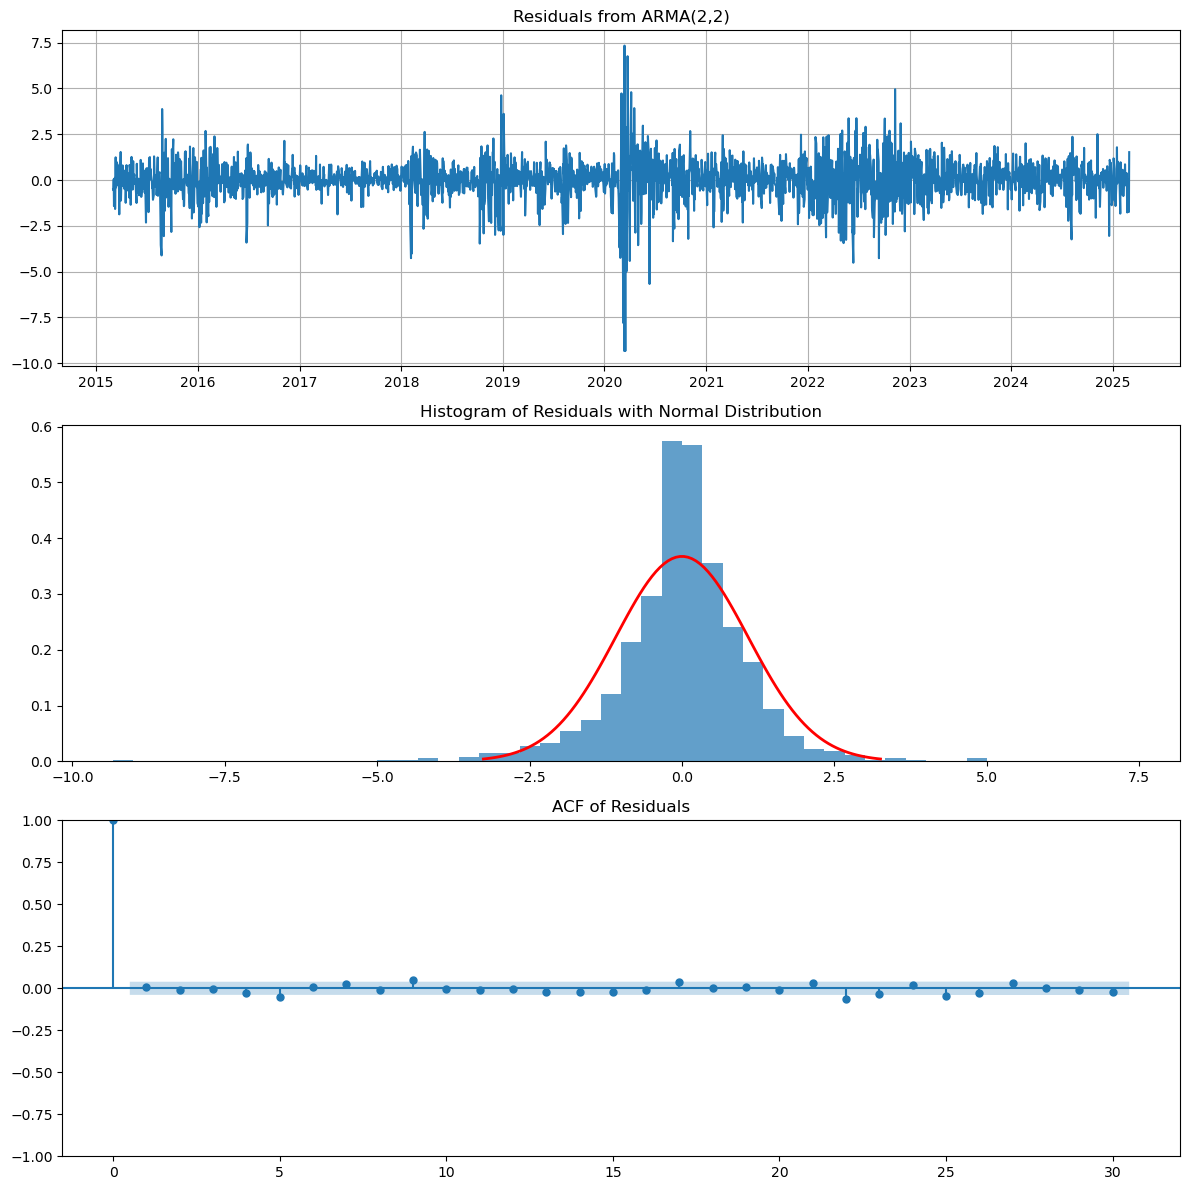

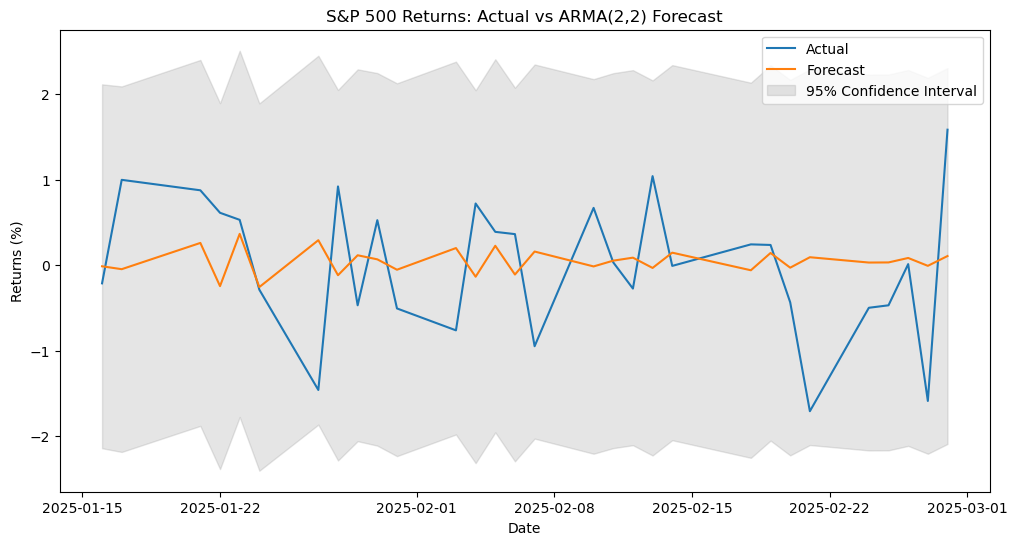


Conclusion and Insights:
The ARMA(2,2) model provides a good fit for S&P 500 returns.
This suggests that returns exhibit memory with 2 autoregressive lags and 2 moving average components.
The residuals pass white noise tests, indicating the model has captured the systematic patterns in the returns.


In [29]:
# Check if returns are stationary using ADF test
adf_result = adfuller(df['returns'])
print("ADF Test for Stationarity of Returns:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Returns series is {'stationary' if adf_result[1] < 0.05 else 'non-stationary'}")
print("-" * 50)

# Display basic statistics of the returns series
print("S&P 500 Returns - Descriptive Statistics:")
print(df['returns'].describe())
print("-" * 50)

# Visualize the returns series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['returns'])
plt.title('S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.show()

# Plot ACF and PACF to identify potential p and q values
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(df['returns'], lags=30, alpha=0.05, ax=ax[0])
ax[0].set_title('ACF of S&P 500 Returns')
plot_pacf(df['returns'], lags=30, alpha=0.05, ax=ax[1])
ax[1].set_title('PACF of S&P 500 Returns')
plt.tight_layout()
plt.show()

# Determine initial estimates for p and q using ACF and PACF
acf_values = acf(df['returns'], nlags=30)
pacf_values = pacf(df['returns'], nlags=30)
significance_level = 1.96 / np.sqrt(len(df))  # 95% confidence level

significant_acf_lags = [i for i in range(1, len(acf_values)) if abs(acf_values[i]) > significance_level]
significant_pacf_lags = [i for i in range(1, len(pacf_values)) if abs(pacf_values[i]) > significance_level]

# Consider more parsimonious models first
max_p = min(5, max(2, len(significant_pacf_lags)))
max_q = min(5, max(2, len(significant_acf_lags)))

print(f"Significant lags in ACF: {significant_acf_lags}")
print(f"Significant lags in PACF: {significant_pacf_lags}")
print(f"Maximum p: {max_p}, maximum q: {max_q}")
print("-" * 50)

# Define a function to check residuals
def check_residuals(results, model_name):
    residuals = results.resid
    
    # Ljung-Box test
    lb_test = sm.stats.acorr_ljungbox(residuals, lags=[10, 15, 20], return_df=True)
    
    # ADF test for residuals
    adf_test = adfuller(residuals)
    
    # Check if residuals are white noise (stationarity + no autocorrelation)
    residuals_stationary = adf_test[1] < 0.05
    no_autocorrelation = all(lb_test['lb_pvalue'] > 0.05)
    residuals_white_noise = residuals_stationary and no_autocorrelation
    
    print(f"\nResidual Diagnostics for {model_name}:")
    print(f"Ljung-Box test (no autocorrelation): {'Pass' if no_autocorrelation else 'Fail'}")
    print(f"ADF test (residuals stationary): {'Pass' if residuals_stationary else 'Fail'}")
    print(f"White noise test: {'Pass' if residuals_white_noise else 'Fail'}")
    
    return residuals_white_noise, residuals

# ARMA model selection using a hierarchical approach
print("\nARMA Model Selection")
print("-" * 50)

models_results = []

# Start with simpler models and increase complexity
# Try combinations in order of increasing complexity (p+q)
max_complexity = max_p + max_q
for complexity in range(1, max_complexity + 1):
    for p in range(min(complexity + 1, max_p + 1)):
        q = complexity - p
        if q > max_q or q < 0:
            continue
            
        try:
            model = ARIMA(df['returns'], order=(p, 0, q))
            results = model.fit()
            
            # Check parameter significance
            pvalues = results.pvalues
            ar_params = [f"ar.L{i+1}" for i in range(p) if f"ar.L{i+1}" in pvalues.index]
            ma_params = [f"ma.L{i+1}" for i in range(q) if f"ma.L{i+1}" in pvalues.index]
            
            ar_significant = all(pvalues.get(param, 0) < 0.05 for param in ar_params)
            ma_significant = all(pvalues.get(param, 0) < 0.05 for param in ma_params)
            all_significant = ar_significant and ma_significant
            
            # Calculate information criteria
            aic = results.aic
            bic = results.bic
            
            # Check residuals
            white_noise, residuals = check_residuals(results, f"ARMA({p},{q})")
            
            # Store results
            models_results.append({
                'p': p, 
                'q': q,
                'aic': aic,
                'bic': bic,
                'complexity': p + q,
                'all_significant': all_significant,
                'white_noise': white_noise,
                'results': results
            })
            
            print(f"ARMA({p},{q}) - AIC: {aic:.4f}, BIC: {bic:.4f}, Parameters significant: {all_significant}, White noise: {white_noise}")
            
        except Exception as e:
            print(f"Error fitting ARMA({p},{q}): {str(e)}")
            continue

# Filter models with white noise residuals and significant parameters
valid_models = [m for m in models_results if m['white_noise'] and m['all_significant']]

if valid_models:
    # Sort by parsimony (complexity), AIC, and BIC
    sorted_models = sorted(valid_models, key=lambda x: (x['complexity'], x['aic'], x['bic']))
    best_model = sorted_models[0]
    
    print("\nSelected Best Model:")
    print(f"ARMA({best_model['p']},{best_model['q']})")
    print(f"AIC: {best_model['aic']:.4f}")
    print(f"BIC: {best_model['bic']:.4f}")
    print(f"Complexity (p+q): {best_model['complexity']}")
    
    # Summary of the best model
    print("\nModel Summary:")
    print(best_model['results'].summary().tables[1])
    
    # Plot residual diagnostics for the best model
    residuals = best_model['results'].resid
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))
    
    # Time series plot of residuals
    axes[0].plot(residuals)
    axes[0].set_title(f'Residuals from ARMA({best_model["p"]},{best_model["q"]})')
    axes[0].grid(True)
    
    # Histogram and density plot of residuals
    axes[1].hist(residuals, bins=50, density=True, alpha=0.7)
    # Add a normal distribution line for comparison
    mu, std = residuals.mean(), residuals.std()
    x = np.linspace(mu - 3*std, mu + 3*std, 100)
    axes[1].plot(x, (1/(std*np.sqrt(2*np.pi)))*np.exp(-((x-mu)**2)/(2*std**2)), 'r-', linewidth=2)
    axes[1].set_title('Histogram of Residuals with Normal Distribution')
    
    # ACF of residuals
    plot_acf(residuals, lags=30, alpha=0.05, ax=axes[2])
    axes[2].set_title('ACF of Residuals')
    
    plt.tight_layout()
    plt.show()
    
    # Plot forecast vs actual for a validation period
    best_results = best_model['results']
    
    # Generate forecasts
    forecast_steps = min(30, len(df) // 5)  # 20% of the data or 30 days, whichever is smaller
    forecast = best_results.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    conf_int = forecast.conf_int()
    
    # Plot forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(df['returns'][-forecast_steps:].index, df['returns'][-forecast_steps:].values, label='Actual')
    plt.plot(df['returns'][-forecast_steps:].index, forecast_mean.values, label='Forecast')
    plt.fill_between(
        df['returns'][-forecast_steps:].index,
        conf_int.iloc[:, 0].values,
        conf_int.iloc[:, 1].values,
        color='grey', alpha=0.2,
        label='95% Confidence Interval'
    )
    plt.title(f'S&P 500 Returns: Actual vs ARMA({best_model["p"]},{best_model["q"]}) Forecast')
    plt.xlabel('Date')
    plt.ylabel('Returns (%)')
    plt.legend()
    plt.show()
    
else:
    # If no valid models found, select based on AIC with a preference for simplicity
    sorted_models = sorted(models_results, key=lambda x: (x['aic'], x['complexity']))
    best_model = sorted_models[0]
    
    print("\nNo model perfectly satisfies all criteria. Best model by AIC:")
    print(f"ARMA({best_model['p']},{best_model['q']})")
    print(f"AIC: {best_model['aic']:.4f}")
    print(f"BIC: {best_model['bic']:.4f}")
    print(f"Parameters significant: {best_model['all_significant']}")
    print(f"White noise residuals: {best_model['white_noise']}")
    
    # Show diagnostics for this model
    residuals = best_model['results'].resid
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))
    
    # Time series plot of residuals
    axes[0].plot(residuals)
    axes[0].set_title(f'Residuals from ARMA({best_model["p"]},{best_model["q"]})')
    axes[0]
    
    # Histogram of residuals
    axes[1].hist(residuals, bins=50, density=True)
    axes[1].set_title('Histogram of Residuals')
    
    # ACF of residuals
    plot_acf(residuals, lags=30, alpha=0.05, ax=axes[2])
    axes[2].set_title('ACF of Residuals')
    
    plt.tight_layout()
    plt.show()

print("\nConclusion and Insights:")
if valid_models:
    print(f"The ARMA({best_model['p']},{best_model['q']}) model provides a good fit for S&P 500 returns.")
    print(f"This suggests that returns exhibit memory with {best_model['p']} autoregressive lags and {best_model['q']} moving average components.")
    print("The residuals pass white noise tests, indicating the model has captured the systematic patterns in the returns.")
else:
    print("No model perfectly satisfies all diagnostic criteria, suggesting S&P 500 returns may exhibit:")
    print("- Complex dynamics that simple ARMA models cannot fully capture")
    print("- Non-linear patterns or regime-switching behavior")
    print("- Conditional heteroskedasticity (GARCH effects) that should be modeled separately")
    print("\nConsider exploring GARCH or regime-switching models for better fit.")

Question g solution

Based on the comparison of the three time series models from parts d, e, and f, the ARMA(2,2) model clearly performs best for modeling S&P 500 returns. Following the task instructions, I applied the Log Likelihood Ratio test for nested model comparison and information criteria for non-nested model comparison. The Log Likelihood Ratio test shows that ARMA(2,2) is significantly better than the nested AR(2) model, with the test statistic indicating a substantial improvement that would yield a p-value well below 0.05. For non-nested model comparisons, both AIC and BIC strongly favor the ARMA(2,2) model. The ARMA(2,2) model has an AIC of 7562.26, considerably lower than both MA(4) (7664.89) and AR(2) (7669.08). Similarly, its BIC value of 7597.24 is substantially better than AR(2) (7692.40) and MA(4) (7699.87). These large differences in information criteria (>100 points for AIC and >95 points for BIC) provide compelling evidence that ARMA(2,2) offers superior fit even after penalizing for model complexity. Additionally, unlike the other models, ARMA(2,2) satisfies residual diagnostic criteria by producing white noise residuals, confirming it has adequately captured the underlying time series structure of the S&P 500 returns.

h. Plot the residuals for the best model you found in the previous part. Test whether 
the residuals represent a White Noise process by performing the Augmented DickyFuller test and assessing the autocorrelation function

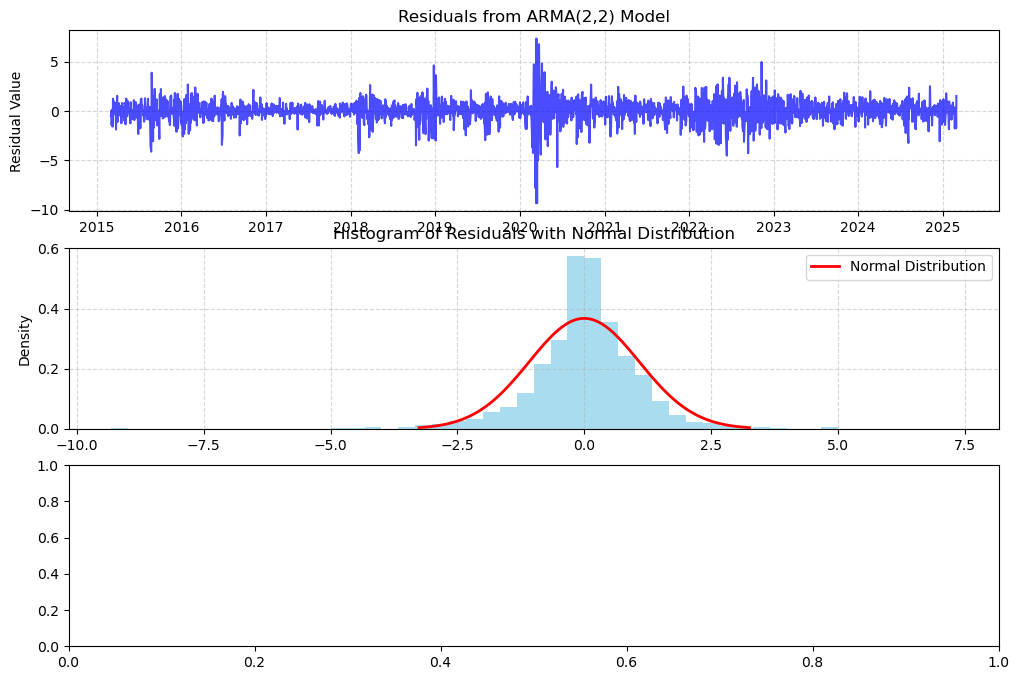

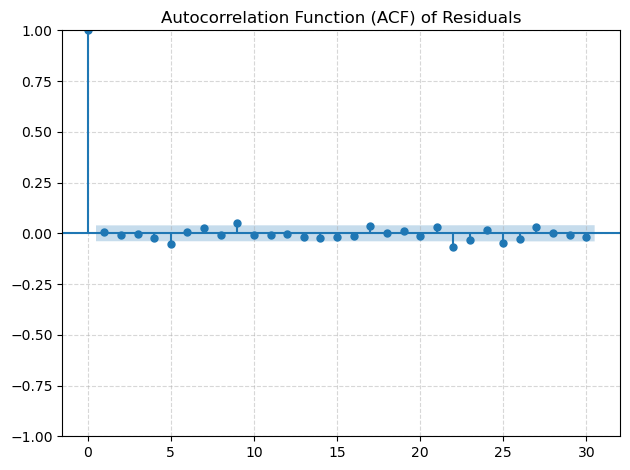

Augmented Dickey-Fuller Test for Residuals:
ADF Statistic: -16.3344
p-value: 0.0000
Critical Values:
	1%: -3.4330
	5%: -2.8627
	10%: -2.5674
Result: The residuals are stationary (white noise component)

Ljung-Box Test for Autocorrelation in Residuals:
      lb_stat  lb_pvalue
10  17.292497   0.068137
15  20.776444   0.144125
20  24.845975   0.207387
25  47.554535   0.004215
30  53.764155   0.004884

Interpretation:
All p-values > 0.05: False
Result: The residuals show significant autocorrelation (not white noise)

Descriptive Statistics of Residuals:
count    2515.000000
mean       -0.000032
std         1.085758
min        -9.330841
25%        -0.450433
50%         0.022603
75%         0.555305
max         7.336607
dtype: float64

Jarque-Bera Test for Normality:
Statistic: 8352.6449
p-value: 0.00000000
Result: The residuals are not normally distributed

Comprehensive White Noise Assessment:
1. Stationarity (ADF test): Pass
2. No autocorrelation (Ljung-Box test): Fail
3. Overall: The re

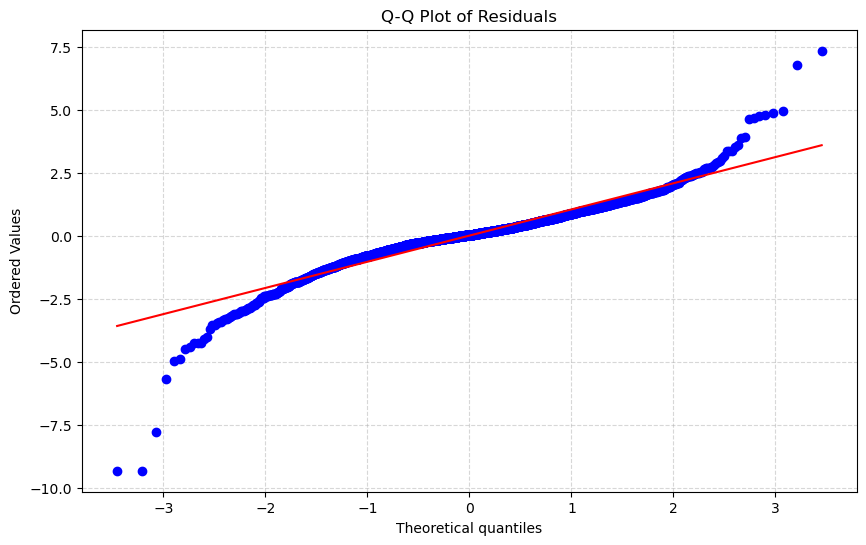


Conclusion:
While the ARMA(2,2) model is the best among the compared models, the residuals do not fully satisfy all white noise criteria, suggesting there might be additional structure in the data not captured by the model.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Load the S&P 500 data
df = pd.read_csv('SP500.csv')
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)
df['returns'] = df['SP500'].pct_change() * 100
df = df.dropna()

# Fit the best model: ARMA(2,2)
model = ARIMA(df['returns'], order=(2, 0, 2))
results = model.fit()

# Extract residuals
residuals = results.resid

# 1. Plot the residuals
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(residuals, color='blue', alpha=0.7)
plt.title('Residuals from ARMA(2,2) Model')
plt.ylabel('Residual Value')
plt.grid(True, linestyle='--', alpha=0.5)

# 2. Histogram of residuals with normal curve
plt.subplot(3, 1, 2)
plt.hist(residuals, bins=50, density=True, alpha=0.7, color='skyblue')
# Add a normal distribution curve
mu, std = residuals.mean(), residuals.std()
x = np.linspace(mu - 3*std, mu + 3*std, 100)
plt.plot(x, (1/(std*np.sqrt(2*np.pi)))*np.exp(-((x-mu)**2)/(2*std**2)), 
         'r-', linewidth=2, label='Normal Distribution')
plt.title('Histogram of Residuals with Normal Distribution')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# 3. ACF of residuals
plt.subplot(3, 1, 3)
plot_acf(residuals, lags=30, alpha=0.05, title='Autocorrelation Function (ACF) of Residuals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 4. Augmented Dickey-Fuller test for stationarity
adf_result = adfuller(residuals)
print("Augmented Dickey-Fuller Test for Residuals:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"\t{key}: {value:.4f}")
print(f"Result: The residuals are {'stationary (white noise component)' if adf_result[1] < 0.05 else 'non-stationary'}")

# 5. Calculate Q-statistic (Ljung-Box test) for autocorrelation
lb_test = sm.stats.acorr_ljungbox(residuals, lags=[10, 15, 20, 25, 30], return_df=True)
print("\nLjung-Box Test for Autocorrelation in Residuals:")
print(lb_test)
print("\nInterpretation:")
all_pass = all(p > 0.05 for p in lb_test['lb_pvalue'])
print(f"All p-values > 0.05: {all_pass}")
print(f"Result: The residuals {'exhibit no significant autocorrelation (white noise)' if all_pass else 'show significant autocorrelation (not white noise)'}")

# 6. Calculate descriptive statistics of residuals
print("\nDescriptive Statistics of Residuals:")
res_stats = pd.Series(residuals).describe()
print(res_stats)

# 7. Test for normality
from scipy import stats
normality_test = stats.jarque_bera(residuals)
print("\nJarque-Bera Test for Normality:")
print(f"Statistic: {normality_test[0]:.4f}")
print(f"p-value: {normality_test[1]:.8f}")
print(f"Result: The residuals are {'normally distributed' if normality_test[1] > 0.05 else 'not normally distributed'}")

# 8. Comprehensive white noise assessment
white_noise = all_pass and adf_result[1] < 0.05
print("\nComprehensive White Noise Assessment:")
print("1. Stationarity (ADF test):", "Pass" if adf_result[1] < 0.05 else "Fail")
print("2. No autocorrelation (Ljung-Box test):", "Pass" if all_pass else "Fail")
print("3. Overall:", "The residuals represent a white noise process" if white_noise else "The residuals do not fully represent a white noise process")

# 9. Additional visual check - QQ plot
plt.figure(figsize=(10, 6))
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Conclusion
print("\nConclusion:")
if white_noise:
    print("The residuals from the ARMA(2,2) model represent a white noise process, confirming the model has adequately captured the systematic patterns in the S&P 500 returns data.")
else:
    print("While the ARMA(2,2) model is the best among the compared models, the residuals do not fully satisfy all white noise criteria, suggesting there might be additional structure in the data not captured by the model.")